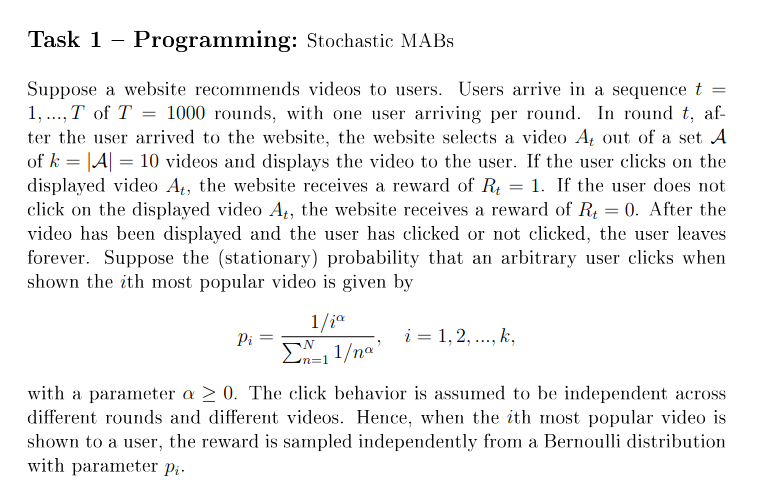

In [1]:
import numpy as np
import matplotlib.pyplot as plt

[0.5011686  0.17718986 0.09644994 0.06264608 0.04482588 0.0341002
 0.02706056 0.02214873 0.0185618  0.01584834]


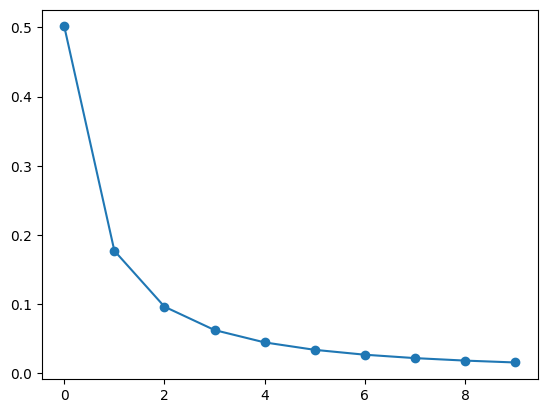

In [ ]:
T = 10
alpha = 1.5

p = np.arange(1, T+1)
p = p ** (-alpha)
p /= np.sum(p) 

print(p)

plt.plot(p, 'o-')

In [153]:
p = np.arange(1, T+1)
p = p ** (-alpha)
p /= np.sum(p)

def generate_reward(action):
    return np.random.binomial(1, p[action])

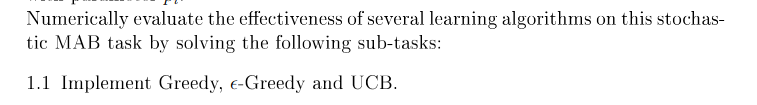

In [154]:
actions = np.arange(10)
print(actions)

[0 1 2 3 4 5 6 7 8 9]


Estimated Q values: [0.    0.173 0.    0.    0.    0.    0.    0.    0.    0.   ]
Action counts: [   0. 1000.    0.    0.    0.    0.    0.    0.    0.    0.]
Total reward: 173


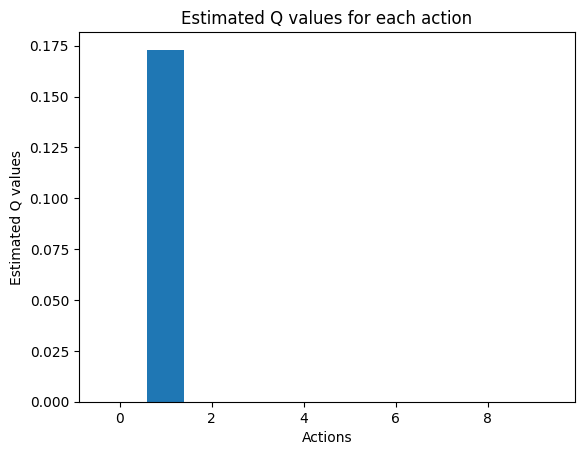

In [155]:
def greedy(T=1000, alpha=1.0):
    Q_hat = np.zeros(len(actions))
    N = np.zeros(len(actions))

    total_reward = 0

    for t in range(T):
        max_value = np.max(Q_hat)
        candidates = np.flatnonzero(Q_hat == max_value)
        cur_action = np.random.choice(candidates)  

        reward = generate_reward(cur_action)
        total_reward += reward
        N[cur_action] += 1  # increment the count for the current action
        Q_hat[cur_action] += (reward - Q_hat[cur_action]) / N[cur_action]

    return Q_hat, N, total_reward

Q_hat, N, total_reward = greedy(T=1000, alpha=1.0)
print("Estimated Q values:", Q_hat)
print("Action counts:", N)
print("Total reward:", total_reward)
plt.bar(actions, Q_hat)
plt.xlabel('Actions')
plt.ylabel('Estimated Q values')
plt.title('Estimated Q values for each action')
plt.show()


Estimated Q values: [0.49625    0.04545455 0.09090909 0.08695652 0.04545455 0.
 0.08333333 0.09090909 0.         0.        ]
Action counts: [800.  22.  22.  23.  22.  26.  24.  33.  18.  10.]
Total reward: 408


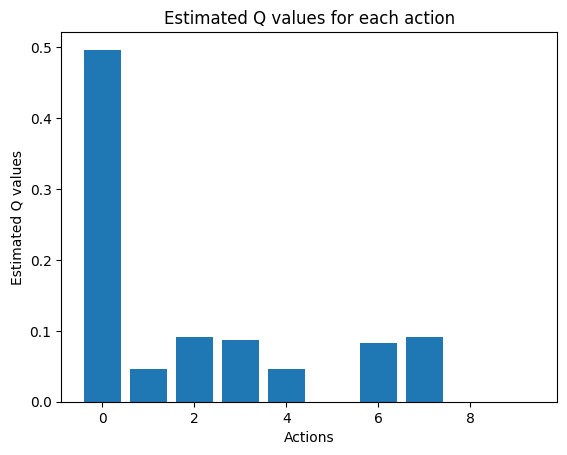

In [157]:
def eps_greedy(T=1000, alpha=1.0, epsilon=0.1):
    Q_hat = np.zeros(len(actions))
    N = np.zeros(len(actions))

    total_reward = 0

    for t in range(T):
        s = np.random.rand()
        cur_action = None
        if s < 1-epsilon:
            max_value = np.max(Q_hat)
            candidates = np.flatnonzero(Q_hat == max_value)
            cur_action = np.random.choice(candidates)  
        else:
            cur_action = np.random.choice(actions)


        reward = generate_reward(cur_action)
        total_reward += reward
        N[cur_action] += 1  # increment the count for the current action
        Q_hat[cur_action] += (reward - Q_hat[cur_action]) / N[cur_action]

    return Q_hat, N, total_reward

Q_hat, N, total_reward = eps_greedy(T=1000, alpha=1.0, epsilon=0.2)
print("Estimated Q values:", Q_hat)
print("Action counts:", N)
print("Total reward:", total_reward)
plt.bar(actions, Q_hat)
plt.xlabel('Actions')
plt.ylabel('Estimated Q values')
plt.title('Estimated Q values for each action')
plt.show()


Estimated Q values: [0.52018634 0.21212121 0.075      0.02941176 0.02941176 0.075
 0.02941176 0.05405405 0.05405405 0.02941176]
Action counts: [644.  66.  40.  34.  34.  40.  34.  37.  37.  34.]
Total reward: 363


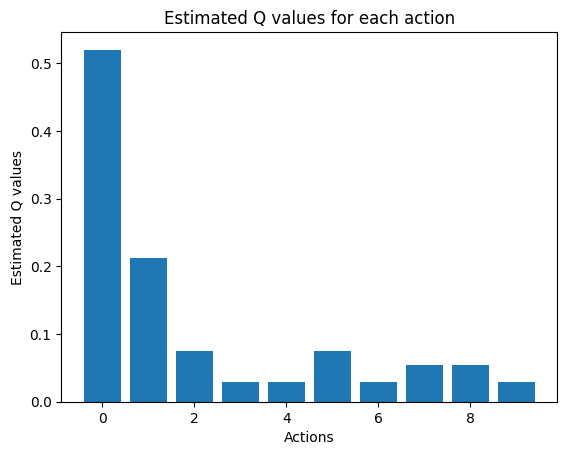

In [158]:
def ucb(T=1000, alpha=1.0, c=2.0):
    Q_hat = np.zeros(len(actions))
    N = np.zeros(len(actions))

    total_reward = 0

    for t in range(T):
        if (t < len(actions)):
            cur_action = t
        else:
            ucb_values = Q_hat + c * np.sqrt(np.log(t+1) / N)
            cur_action = np.argmax(ucb_values)

        reward = generate_reward(cur_action)
        total_reward += reward
        N[cur_action] += 1  # increment the count for the current action
        Q_hat[cur_action] += (reward - Q_hat[cur_action]) / N[cur_action]

    return Q_hat, N, total_reward

Q_hat, N, total_reward = ucb(T=1000, alpha=1.0, c=1.4)
print("Estimated Q values:", Q_hat)
print("Action counts:", N)
print("Total reward:", total_reward)
plt.bar(actions, Q_hat)
plt.xlabel('Actions')
plt.ylabel('Estimated Q values')
plt.title('Estimated Q values for each action')
plt.show()

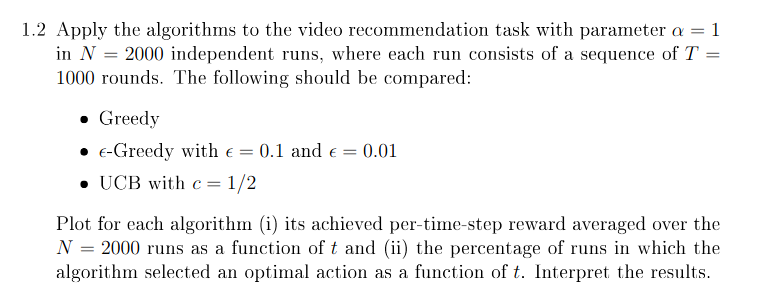

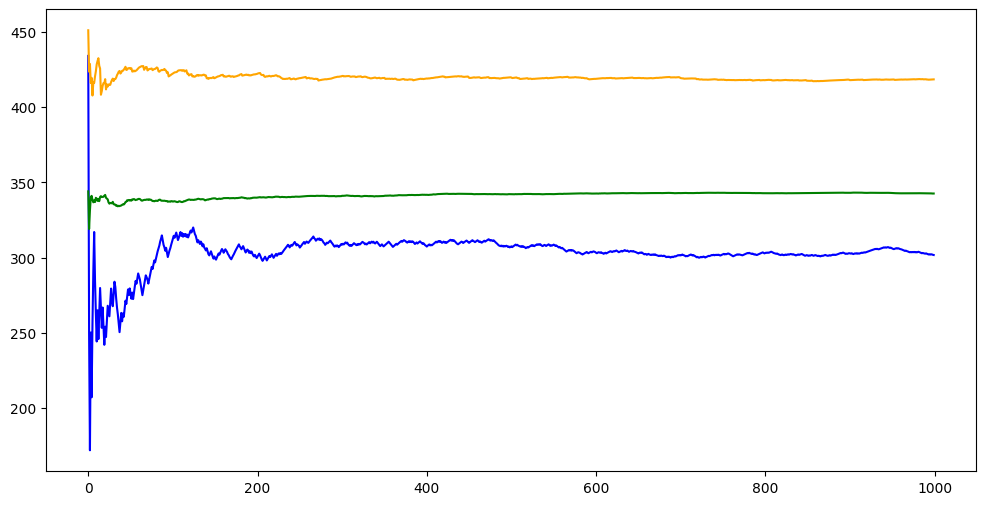

In [160]:
def averages(x):
    return np.cumsum(x) / (np.arange(1, len(x)+1))

Number_of_experiments = 1000
def run_experiments(strategy, T=1000, alpha=1.0, **kwargs):
    total_rewards = []
    best_action = []
    for _ in range(Number_of_experiments):
        Q_hat, N, total_reward = strategy(T=T, alpha=alpha, **kwargs)
        total_rewards.append(total_reward)
        best_action.append(N[0])
    return averages(total_rewards), averages(best_action)

total_rewards_greedy, best_action_greedy = run_experiments(greedy, T=1000, alpha=1.0)
total_rewards_eps_greedy, best_action_eps_greedy = run_experiments(eps_greedy, T=1000, alpha=1.0, epsilon=0.1)
total_rewards_ucb, best_action_ucb = run_experiments(ucb, T=1000, alpha=1.0, c=1.4)
plt.figure(figsize=(12, 6))
plt.plot(total_rewards_greedy, label='Greedy', color='blue')
plt.plot(total_rewards_eps_greedy, label='Epsilon-Greedy', color='orange')
plt.plot(total_rewards_ucb, label='UCB', color='green')